# Predicting Smokers Based on Vital Signs
## Binary Classification using Machine Learning

### Project Overview
- **Goal**: Predict whether an individual is a smoker based on vital signs and health-related features.
- **Type**: Binary Classification
- **Dataset**: Contains vital signs data and smoking status.
- **Task**: Use the training set to build a model that can predict smoking status in the test set.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


### Step 1: Load and Explore the Data

In [8]:
smoking_data = pd.read_csv('smoking.csv')
x_train = pd.read_csv('x_train.csv')
y_train = pd.read_csv('y_train.csv')
x_test = pd.read_csv('x_test.csv')
y_test = pd.read_csv('y_test.csv')


train_data = pd.merge(x_train, y_train, on='ID')

print("Smoking Data:")
print(smoking_data.head())
print("\nTraining Features:")
print(x_train.head())
print("\nTraining Labels:")
print(y_train.head())


Smoking Data:
   ID gender  age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
0   0      F   40         155          60       81.3             1.2   
1   1      F   40         160          60       81.0             0.8   
2   2      M   55         170          60       80.0             0.8   
3   3      M   40         165          70       88.0             1.5   
4   4      F   40         155          60       86.0             1.0   

   eyesight(right)  hearing(left)  hearing(right)  ...  hemoglobin  \
0              1.0            1.0             1.0  ...        12.9   
1              0.6            1.0             1.0  ...        12.7   
2              0.8            1.0             1.0  ...        15.8   
3              1.5            1.0             1.0  ...        14.7   
4              1.0            1.0             1.0  ...        12.5   

   Urine protein  serum creatinine   AST   ALT   Gtp  oral  dental caries  \
0            1.0               0.7  18.0  19.0  27.0   

   ID gender  age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
0   0      F   40         155          60       81.3             1.2   
1   1      F   40         160          60       81.0             0.8   
2   2      M   55         170          60       80.0             0.8   
3   3      M   40         165          70       88.0             1.5   
4   4      F   40         155          60       86.0             1.0   

   eyesight(right)  hearing(left)  hearing(right)  ...  hemoglobin  \
0              1.0            1.0             1.0  ...        12.9   
1              0.6            1.0             1.0  ...        12.7   
2              0.8            1.0             1.0  ...        15.8   
3              1.5            1.0             1.0  ...        14.7   
4              1.0            1.0             1.0  ...        12.5   

   Urine protein  serum creatinine   AST   ALT   Gtp  oral  dental caries  \
0            1.0               0.7  18.0  19.0  27.0     Y           

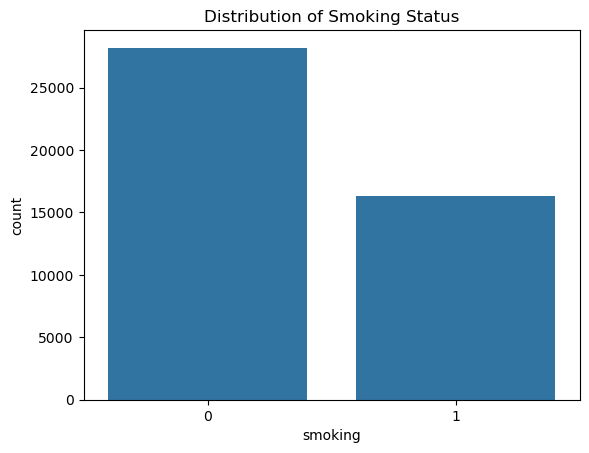

In [9]:
print(train_data.head())

print(train_data.isnull().sum())

print(train_data.describe())

sns.countplot(data=train_data, x='smoking')
plt.title('Distribution of Smoking Status')
plt.show()


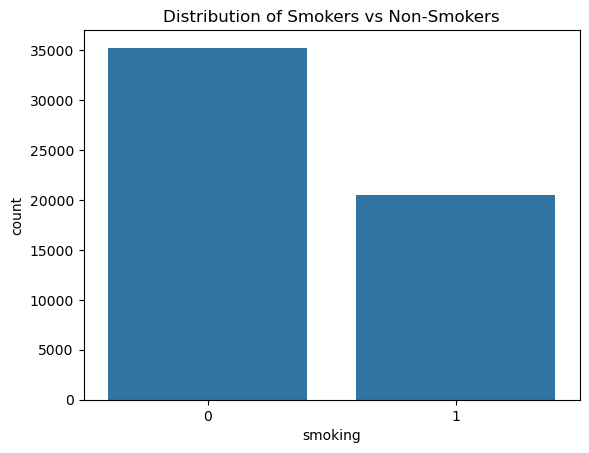

In [10]:

sns.countplot(x='smoking', data=smoking_data)
plt.title('Distribution of Smokers vs Non-Smokers')
plt.show()


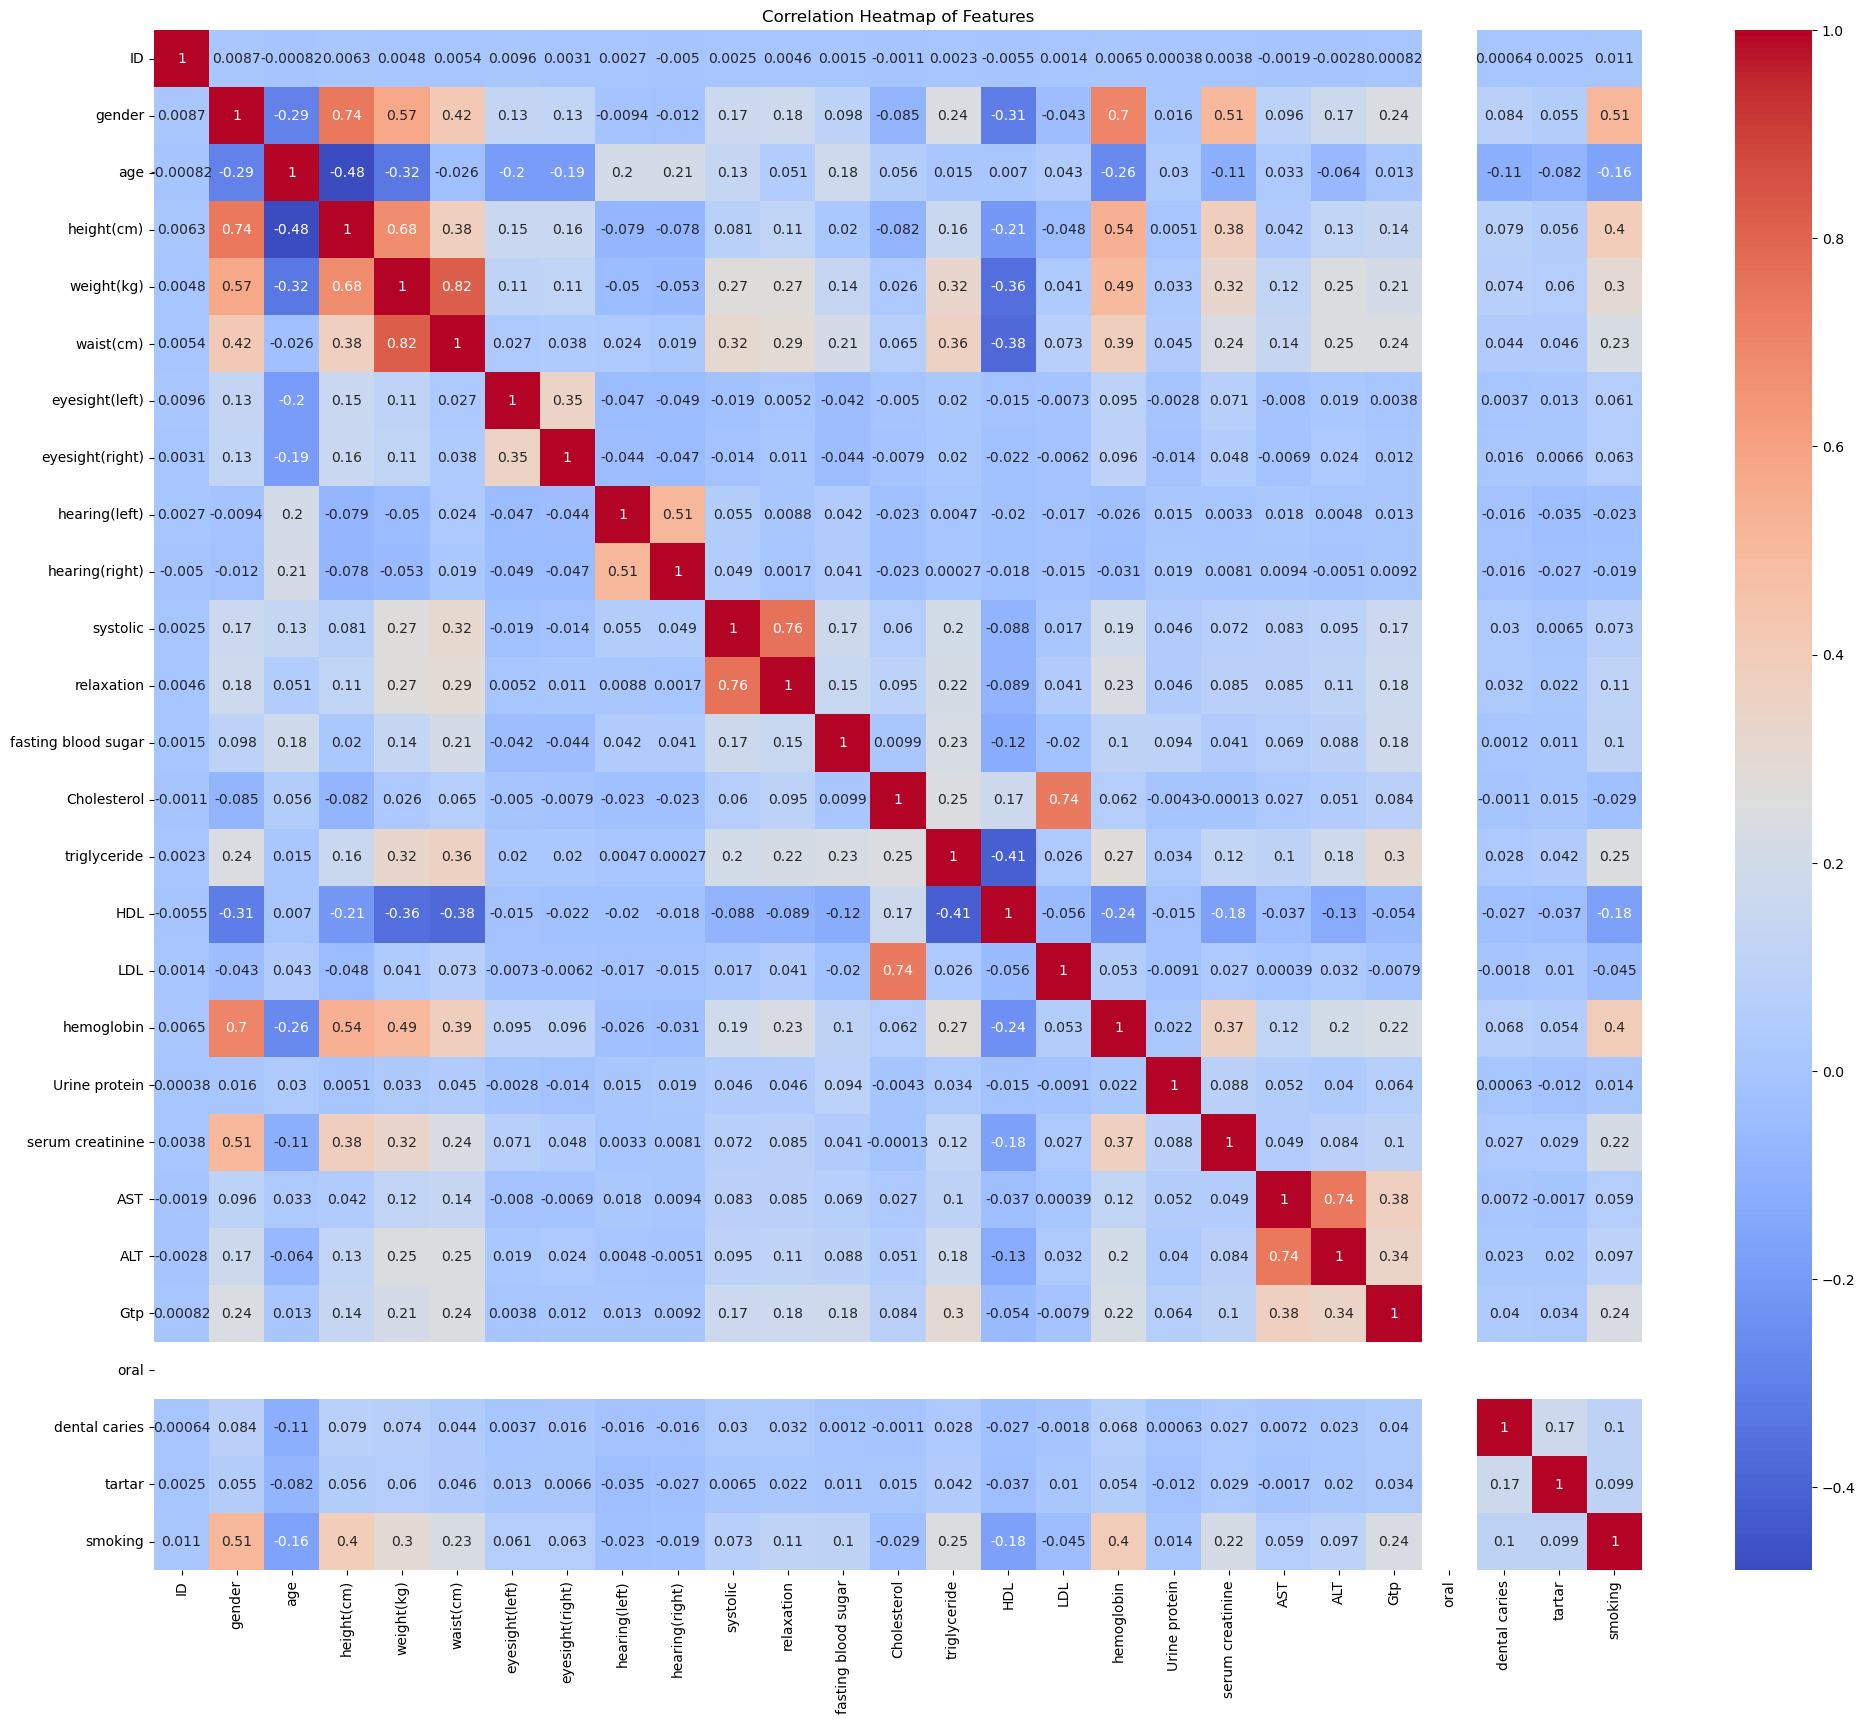

In [11]:

label_encoder = LabelEncoder()

non_numeric_columns = smoking_data.select_dtypes(exclude=[float, int]).columns

for col in non_numeric_columns:
    if smoking_data[col].dtype == 'object':  # Check if the column is of object type (usually strings)
        smoking_data[col] = label_encoder.fit_transform(smoking_data[col])

plt.figure(figsize=(24, 20))
sns.heatmap(smoking_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Features')
plt.show()


### Step 2: Preprocess the Data
- Encoding categorical variables
- Scaling numerical features

In [12]:
train_data['gender'] = train_data['gender'].map({'M': 1, 'F': 0})
train_data['oral'] = train_data['oral'].map({'Y': 1, 'N': 0})
train_data['tartar'] = train_data['tartar'].map({'Y': 1, 'N': 0})

X = train_data.drop(['ID', 'smoking'], axis=1)
y = train_data['smoking']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


### Step 3: Train the Model

In [13]:
model = RandomForestClassifier(random_state=42)

model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

### Step 4: Evaluate the Model

Validation Accuracy: 0.76


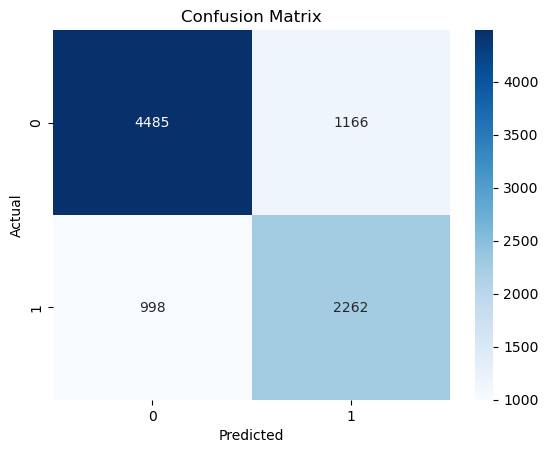

              precision    recall  f1-score   support

           0       0.82      0.79      0.81      5651
           1       0.66      0.69      0.68      3260

    accuracy                           0.76      8911
   macro avg       0.74      0.74      0.74      8911
weighted avg       0.76      0.76      0.76      8911



In [14]:
# Predictions on the validation set
y_pred_val = model.predict(X_val)

# Accuracy score
accuracy = accuracy_score(y_val, y_pred_val)
print(f'Validation Accuracy: {accuracy:.2f}')

# Confusion matrix
cm = confusion_matrix(y_val, y_pred_val)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print(classification_report(y_val, y_pred_val))


In [15]:
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
print(f'Cross-validation scores: {cv_scores}')
print(f'Mean cross-validation score: {cv_scores.mean():.2f}')


Cross-validation scores: [0.75059616 0.75059616 0.75757576 0.75042088 0.75182379]
Mean cross-validation score: 0.75


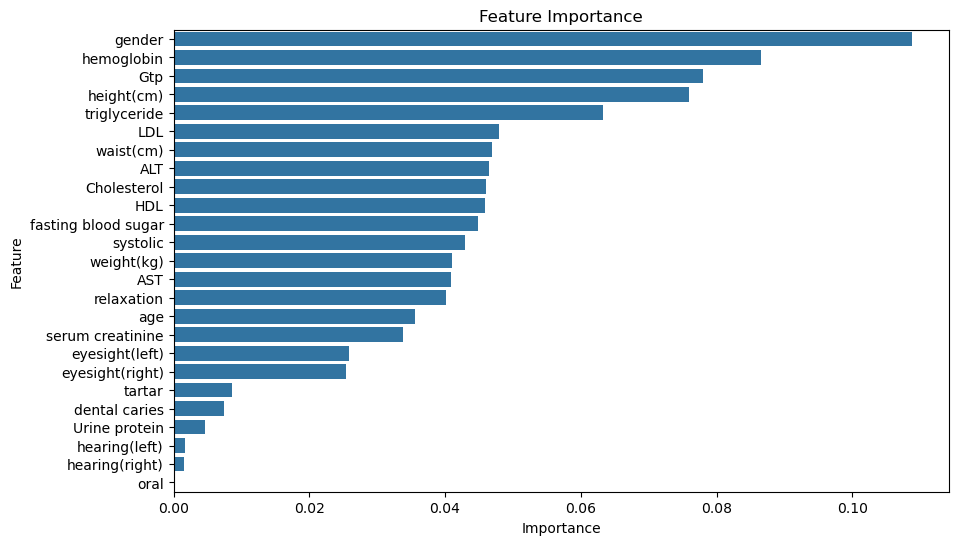

In [16]:
# Feature importance
feature_importances = model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance')
plt.show()


In [17]:
# Encoding categorical features for both training and testing data
def encode_features(df):
    df['gender'] = df['gender'].map({'M': 1, 'F': 0})
    df['oral'] = df['oral'].map({'Y': 1, 'N': 0})
    df['tartar'] = df['tartar'].map({'Y': 1, 'N': 0})
    return df

# Apply encoding to training and testing data
train_data = encode_features(train_data)
x_test = encode_features(x_test)


In [18]:
def predict_smoker_by_id(id_value, model, x_data, y_data):
    try:
        row = x_data[x_data['ID'] == id_value]
        if row.empty:
            return f'ID {id_value} not found in the dataset.'
        features = row.drop(['ID'], axis=1)
        prediction = model.predict(features)
        return f'ID {id_value} is predicted to be a {"smoker" if prediction[0] == 1 else "non-smoker"}.'
    except Exception as e:
        return str(e)

# Example usage
print(predict_smoker_by_id(8, model, x_test, y_test))


ID 8 is predicted to be a smoker.


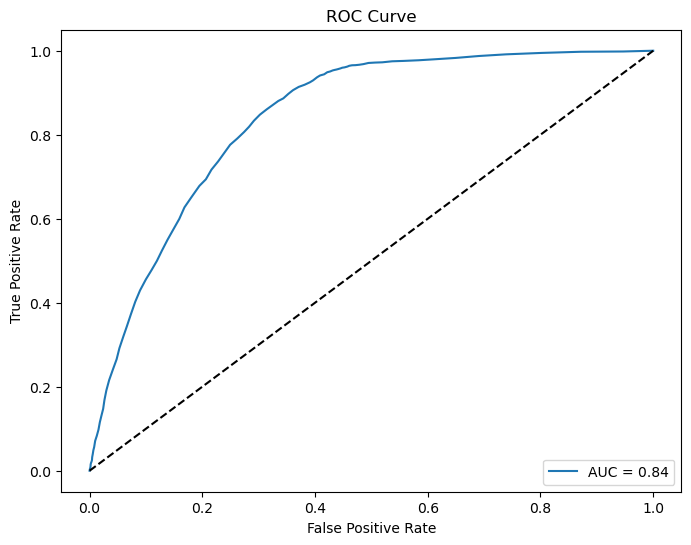

In [19]:
from sklearn.metrics import roc_curve, auc

# Get probabilities
y_proba_val = model.predict_proba(X_val)[:, 1]

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_val, y_proba_val)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


In [20]:
param_grid = {
    'n_estimators': [100, 200],         # number of trees
    'max_depth': [10, 20, None],        # tree depth
    'min_samples_split': [2, 5],        # min samples to split an internal node
    'min_samples_leaf': [1, 2],         # min samples at a leaf node
    'max_features': ['sqrt', 'log2']    # number of features considered for best split
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                           cv=5, scoring='accuracy', n_jobs=-1, verbose=2)


In [21]:
grid_search.fit(X_train, y_train)
best_rf = grid_search.best_estimator_
print("Best parameters:", grid_search.best_params_)


Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   3.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   3.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   3.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   3.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   3.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   3.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   3.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=20

In [25]:
from sklearn.metrics import classification_report


y_pred = best_rf.predict(x_test.drop('ID', axis=1))
print(classification_report(y_test['smoking'], y_pred))


              precision    recall  f1-score   support

           0       0.95      0.95      0.95      7036
           1       0.92      0.91      0.91      4103

    accuracy                           0.94     11139
   macro avg       0.93      0.93      0.93     11139
weighted avg       0.94      0.94      0.94     11139

